In [41]:
from pynq import Overlay, Xlnk
import numpy as np
from PIL import Image, ImageOps
import matplotlib.pyplot as plt
import time
import cv2
import time
xlnk = Xlnk()


In [59]:
ov = Overlay("/home/xilinx/jupyter_notebooks/HLS_Basics/pynq_axis/dwc2_conv.bit")
#ov?
'''IP Blocks
----------
axi_dma_0            : pynq.lib.dma.DMA'''

dma = ov.axi_dma_0

Image size: 512x512
[[160 160 160 ..., 169 154 129]
 [161 160 159 ..., 168 154 129]
 [160 161 160 ..., 168 154 129]
 ..., 
 [ 50  49  55 ..., 106 103 104]
 [ 49  50  58 ..., 107 109 111]
 [ 50  49  59 ..., 107 108 112]]


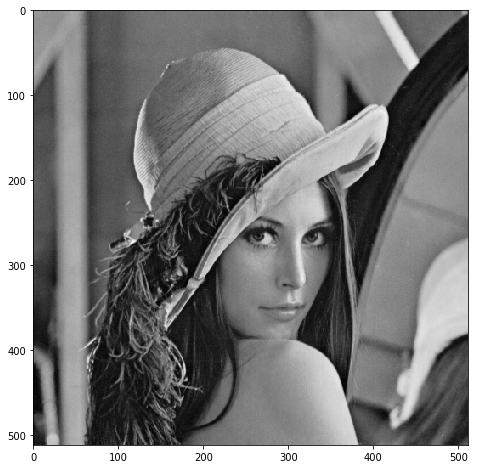

In [71]:

img_path = "/home/xilinx/jupyter_notebooks/Images/lena_gray.bmp"
img = Image.open(img_path)
img = ImageOps.grayscale(img)

width, height = img.size

print("Image size: {}x{}".format(width, height))

img_inbuff = xlnk.cma_array(shape=(height,width),dtype = np.uint8, cacheable = 1)
img_outbuff = xlnk.cma_array(shape=(height-2,width-2),dtype = np.int8, cacheable = 1)

img_inbuff[:] = np.array(img)

print(img_inbuff)
 
canvas = plt.gcf()
size = canvas.get_size_inches()
canvas.set_size_inches(size*2)
_ = plt.imshow(img_inbuff, cmap='gray') 


In [72]:
def dmafunc1():
    
    dma.sendchannel.transfer(img_inbuff)
    dma.recvchannel.transfer(img_outbuff)
    dma.sendchannel.wait()
    dma.recvchannel.wait()
    

In [73]:
start_time = time.time()
dmafunc1()
end_time = time.time()
print("Time taken", end_time - start_time)

Time taken 0.00805044174194336


Image size: 510x510 pixels.
<PIL.Image.Image image mode=I size=510x510 at 0xA4FF64F0>


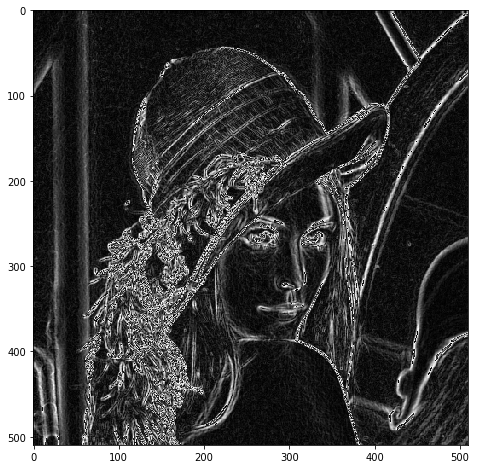

In [74]:
canvas = plt.gcf()
size = canvas.get_size_inches()
canvas.set_size_inches(size*2)


outimg = Image.fromarray(img_outbuff)
o_width, o_height = outimg.size
print("Image size: {}x{} pixels.".format(o_width,o_height))
_ = plt.imshow(outimg)
print(outimg)

In [75]:
%%time
dmafunc1()

CPU times: user 0 ns, sys: 6.68 ms, total: 6.68 ms
Wall time: 6 ms


In [76]:
xlnk.xlnk_reset()

### using s_axilite to return

Image size: 512x512
[[160 160 160 ..., 169 154 129]
 [161 160 159 ..., 168 154 129]
 [160 161 160 ..., 168 154 129]
 ..., 
 [ 50  49  55 ..., 106 103 104]
 [ 49  50  58 ..., 107 109 111]
 [ 50  49  59 ..., 107 108 112]]


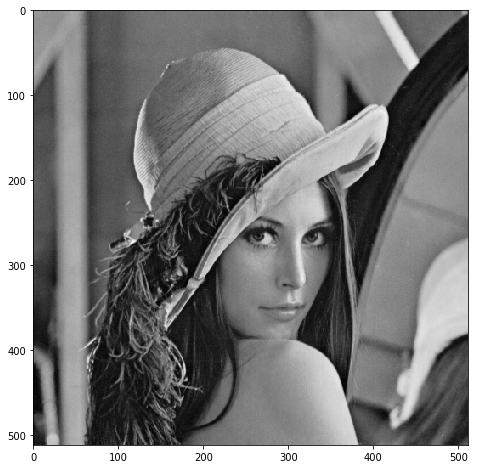

In [77]:
from pynq import Overlay, Xlnk
import numpy as np
from PIL import Image, ImageOps
import matplotlib.pyplot as plt
import time
import cv2

xlnk = Xlnk()

ov = Overlay("/home/xilinx/jupyter_notebooks/HLS_Basics/pynq_axis/return_conv.bit")
#ov?
'''IP Blocks
----------
axi_dma_0            : pynq.lib.dma.DMA
conv1_0              : pynq.overlay.DefaultIP'''

#ov.conv1_0.register_map
'''RegisterMap {
  CTRL = Register(AP_START=0, AP_DONE=0, AP_IDLE=1, AP_READY=0, RESERVED_1=0, AUTO_RESTART=0, RESERVED_2=0),
  GIER = Register(Enable=0, RESERVED=0),
  IP_IER = Register(CHAN0_INT_EN=0, CHAN1_INT_EN=0, RESERVED=0),
  IP_ISR = Register(CHAN0_INT_ST=0, CHAN1_INT_ST=0, RESERVED=0)
}'''

#Defining the IPs
dma = ov.axi_dma_0
ip = ov.conv1_0

#Reading the image
img_path = "/home/xilinx/jupyter_notebooks/Images/lena_gray.bmp"
img = Image.open(img_path)
img = ImageOps.grayscale(img)
width, height = img.size
print("Image size: {}x{}".format(width, height))
 
#Defining the CMA Buffers
img_inbuff = xlnk.cma_array(shape=(height,width),dtype = np.uint8, cacheable = 1)
img_outbuff = xlnk.cma_array(shape=(height-2,width-2),dtype = np.int8, cacheable = 1)

img_inbuff[:] = np.array(img)
canvas = plt.gcf()
size = canvas.get_size_inches()
canvas.set_size_inches(size*2)
_ = plt.imshow(img_inbuff, cmap='gray')

print(img_inbuff)


In [78]:
#DMA Transfer and receive

def dmafunc2():
    dma.sendchannel.transfer(img_inbuff)
    dma.recvchannel.transfer(img_outbuff)
    ov.conv1_0.register_map.CTRL.AP_START = 1
    dma.sendchannel.wait()
    dma.recvchannel.wait()


In [79]:
start_time = time.time()
dmafunc2()
end_time = time.time()
print("Time taken", end_time - start_time)

Time taken 0.02716970443725586


Image size: 510x510 pixels.


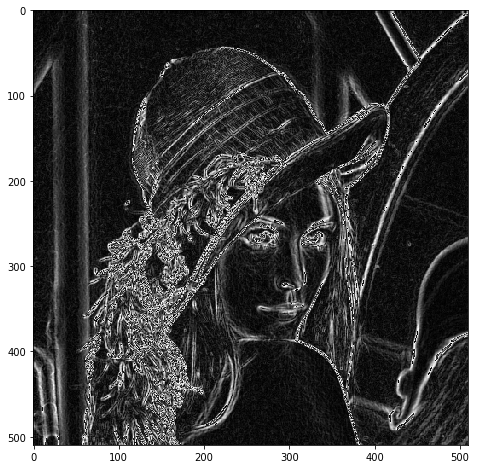

In [80]:
#Printing the output
canvas = plt.gcf()
size = canvas.get_size_inches()
canvas.set_size_inches(size*2)

outimg = Image.fromarray(img_outbuff)
o_width, o_height = outimg.size
print("Image size: {}x{} pixels.".format(o_width,o_height))
_ = plt.imshow(outimg)


In [81]:
print(img_outbuff)


[[  6   6   8 ...,   2  66 -98]
 [  6  10   6 ...,   2  66 -96]
 [  6   8   8 ...,   2  62 -96]
 ..., 
 [ 26  10  18 ...,  66  32  44]
 [ 22  28  16 ...,  42  16  34]
 [ 36  34  10 ...,  20  20  30]]


In [82]:
%%time
dmafunc2()

CPU times: user 16.5 ms, sys: 0 ns, total: 16.5 ms
Wall time: 16.9 ms


In [29]:
xlnk.xlnk_reset()

### with thresholding

Image size: 512x512
[[160 160 160 ..., 169 154 129]
 [161 160 159 ..., 168 154 129]
 [160 161 160 ..., 168 154 129]
 ..., 
 [ 50  49  55 ..., 106 103 104]
 [ 49  50  58 ..., 107 109 111]
 [ 50  49  59 ..., 107 108 112]]


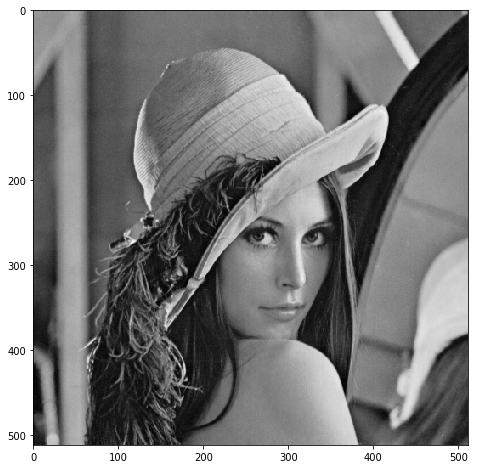

In [2]:
from pynq import Overlay, Xlnk
import numpy as np
from PIL import Image, ImageOps
import matplotlib.pyplot as plt
import time
import cv2

xlnk = Xlnk()

ov = Overlay("/home/xilinx/jupyter_notebooks/HLS_Basics/pynq_axis/thresh_conv.bit")

#Defining the IPs
dma = ov.axi_dma_0
ip = ov.conv1_0

#Reading the image
img_path = "/home/xilinx/jupyter_notebooks/Images/lena_gray.bmp"
img = Image.open(img_path)
img = ImageOps.grayscale(img)
width, height = img.size
print("Image size: {}x{}".format(width, height))
 
#Defining the CMA Buffers
img_inbuff = xlnk.cma_array(shape=(height,width),dtype = np.uint8, cacheable = 1)
img_outbuff = xlnk.cma_array(shape=(height-2,width-2),dtype = np.int8, cacheable = 1)

img_inbuff[:] = np.array(img)
canvas = plt.gcf()
size = canvas.get_size_inches()
canvas.set_size_inches(size*2)
_ = plt.imshow(img_inbuff, cmap='gray')

print(img_inbuff)


In [3]:
#DMA Transfer and receive

def dmafunc3():
    dma.sendchannel.transfer(img_inbuff)
    dma.recvchannel.transfer(img_outbuff)
    ov.conv1_0.register_map.CTRL.AP_START = 1
    dma.sendchannel.wait()
    dma.recvchannel.wait()

In [4]:
start_time = time.time()
dmafunc3()
end_time = time.time()
print("Time taken", end_time - start_time)

Time taken 0.033873558044433594


Image size: 510x510 pixels.


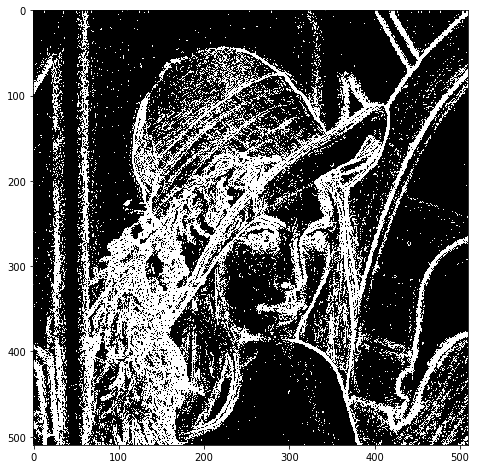

In [5]:
#Printing the output
canvas = plt.gcf()
size = canvas.get_size_inches()
canvas.set_size_inches(size*2)

outimg = Image.fromarray(img_outbuff)
o_width, o_height = outimg.size
print("Image size: {}x{} pixels.".format(o_width,o_height))
_ = plt.imshow(outimg)


In [6]:
%%time
dmafunc3()

CPU times: user 15.5 ms, sys: 287 µs, total: 15.8 ms
Wall time: 20.6 ms


In [7]:
xlnk.xlnk_reset()

### Gensize conv

Image size: 1600x900
[[165 165 165 ...,  52  52  52]
 [165 165 165 ...,  52  52  52]
 [163 163 163 ...,  51  51  51]
 ..., 
 [ 93  94  95 ..., 110 109 108]
 [ 94  96  96 ..., 110 109 108]
 [ 95  97  97 ..., 110 109 109]]


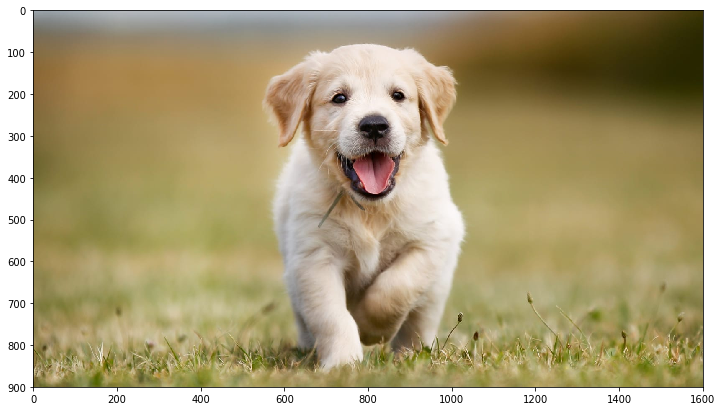

In [32]:
from pynq import Overlay, Xlnk
import numpy as np
from PIL import Image, ImageOps
import matplotlib.pyplot as plt
import time
import cv2

xlnk = Xlnk()

ov = Overlay("/home/xilinx/jupyter_notebooks/HLS_Basics/pynq_axis/gensize_conv.bit")
#ov?
'''
IP Blocks
----------
axi_dma_0            : pynq.lib.dma.DMA
conv2_0              : pynq.overlay.DefaultIP'''

#Defining the IPs
dma = ov.axi_dma_0
ip = ov.conv2_0
#ip.register_map
'''
RegisterMap {
  CTRL = Register(AP_START=0, AP_DONE=0, AP_IDLE=1, AP_READY=0, RESERVED_1=0, AUTO_RESTART=0, RESERVED_2=0),
  GIER = Register(Enable=0, RESERVED=0),
  IP_IER = Register(CHAN0_INT_EN=0, CHAN1_INT_EN=0, RESERVED=0),
  IP_ISR = Register(CHAN0_INT_ST=0, CHAN1_INT_ST=0, RESERVED=0),
  rows = Register(rows=0),
  cols = Register(cols=0)
}'''


#Reading the image
img_path = "/home/xilinx/jupyter_notebooks/Images/dog.jpeg"
img = Image.open(img_path)

canvas = plt.gcf()
size = canvas.get_size_inches()
canvas.set_size_inches(size*2)
_ = plt.imshow(img)

img = ImageOps.grayscale(img)
width, height = img.size
ip.register_map.rows = height
ip.register_map.cols = width
print("Image size: {}x{}".format(width, height))
 
#Defining the CMA Buffers
img_inbuff = xlnk.cma_array(shape=(height,width),dtype = np.uint8, cacheable = 1)
img_outbuff = xlnk.cma_array(shape=(height-2,width-2),dtype = np.int8, cacheable = 1)

img_inbuff[:] = np.array(img)
'''
#_ = plt.imshow(img_inbuff, cmap='gray')'''

print(img_inbuff)


In [5]:
#DMA Transfer and receive

def dmafunc4():
    dma.sendchannel.transfer(img_inbuff)
    dma.recvchannel.transfer(img_outbuff)
    ov.conv2_0.register_map.CTRL.AP_START = 1
    dma.sendchannel.wait()
    dma.recvchannel.wait()

In [34]:
#Call the dma function and calculate the time taken
start_time = time.time()
dmafunc4()
end_time = time.time()
print("Time taken", end_time - start_time)

Time taken 0.03681325912475586


Image size: 1598x898 pixels.


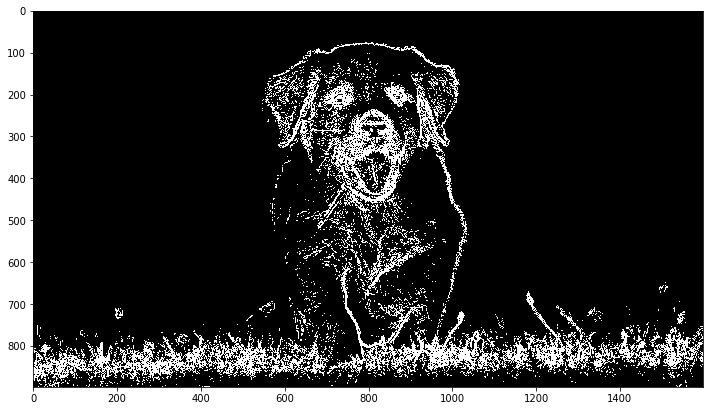

In [35]:
#Printing the output
canvas = plt.gcf()
size = canvas.get_size_inches()
canvas.set_size_inches(size*2)

outimg = Image.fromarray(img_outbuff)
o_width, o_height = outimg.size
print("Image size: {}x{} pixels.".format(o_width,o_height))
_ = plt.imshow(outimg)


Image size: 1600x900
[[165 165 165 ...,  52  52  52]
 [165 165 165 ...,  52  52  52]
 [163 163 163 ...,  51  51  51]
 ..., 
 [ 93  94  95 ..., 110 109 108]
 [ 94  96  96 ..., 110 109 108]
 [ 95  97  97 ..., 110 109 109]]


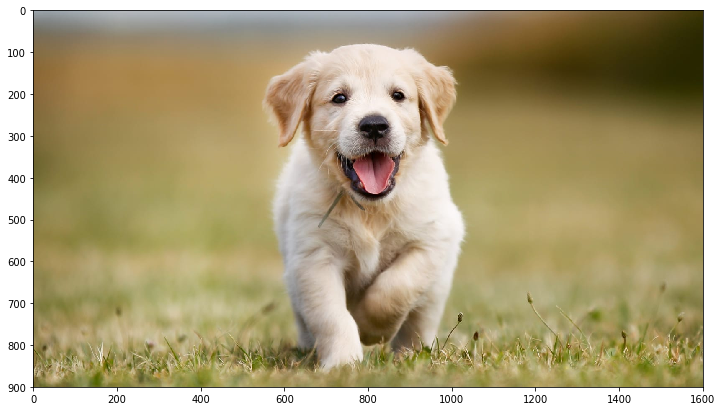

In [13]:
from pynq import Overlay, Xlnk
import numpy as np
from PIL import Image, ImageOps
import matplotlib.pyplot as plt
import time
import cv2

xlnk = Xlnk()

ov = Overlay("/home/xilinx/jupyter_notebooks/HLS_Basics/pynq_axis/linemux_conv1.bit")
ov?
'''
IP Blocks
----------
axi_dma_0            : pynq.lib.dma.DMA
conv_linemux_0              : pynq.overlay.DefaultIP'''

#Defining the IPs
dma = ov.axi_dma_0
ip = ov.conv_linemux_0 
#ip.register_map
'''
RegisterMap {
  CTRL = Register(AP_START=0, AP_DONE=0, AP_IDLE=1, AP_READY=0, RESERVED_1=0, AUTO_RESTART=0, RESERVED_2=0),
  GIER = Register(Enable=0, RESERVED=0),
  IP_IER = Register(CHAN0_INT_EN=0, CHAN1_INT_EN=0, RESERVED=0),
  IP_ISR = Register(CHAN0_INT_ST=0, CHAN1_INT_ST=0, RESERVED=0),
  rows = Register(rows=0),
  cols = Register(cols=0)
}'''


#Reading the image
img_path = "/home/xilinx/jupyter_notebooks/Images/dog.jpeg"
img = Image.open(img_path)

canvas = plt.gcf()
size = canvas.get_size_inches()
canvas.set_size_inches(size*2)
_ = plt.imshow(img)

img = ImageOps.grayscale(img)
width, height = img.size
ip.register_map.rows = height
ip.register_map.cols = width
print("Image size: {}x{}".format(width, height))
 
#Defining the CMA Buffers
img_inbuff = xlnk.cma_array(shape=(height,width),dtype = np.uint8, cacheable = 1)
img_outbuff = xlnk.cma_array(shape=(height-2,width-2),dtype = np.int8, cacheable = 1)

img_inbuff[:] = np.array(img)
'''
#_ = plt.imshow(img_inbuff, cmap='gray')'''

print(img_inbuff)




In [14]:
#DMA Transfer and receive

def dmafunc5():
    dma.sendchannel.transfer(img_inbuff)
    dma.recvchannel.transfer(img_outbuff)
    ov.conv_linemux_0.register_map.CTRL.AP_START = 1
    dma.sendchannel.wait()
    dma.recvchannel.wait()

In [19]:
#Call the dma function and calculate the time taken
start_time = time.time()
dmafunc5()
end_time = time.time()
print("Time taken", end_time - start_time)

Time taken 0.0497288703918457


Image size: 1598x898 pixels.


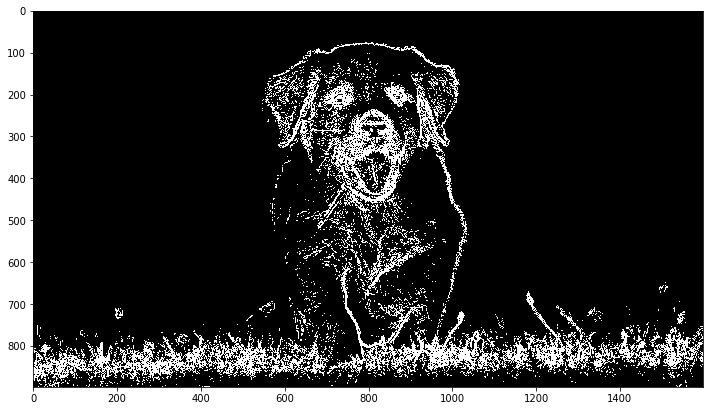

In [18]:
#Printing the output
canvas = plt.gcf()
size = canvas.get_size_inches()
canvas.set_size_inches(size*2)

outimg = Image.fromarray(img_outbuff)
o_width, o_height = outimg.size
print("Image size: {}x{} pixels.".format(o_width,o_height))
_ = plt.imshow(outimg)


In [1]:
xlnk.xlnk_reset()

NameError: name 'xlnk' is not defined

Image size: 1600x900
[[[157 168 174]
  [157 168 174]
  [157 168 174]
  ..., 
  [ 63  55   8]
  [ 63  55   8]
  [ 63  55   8]]

 [[157 168 174]
  [157 168 174]
  [157 168 174]
  ..., 
  [ 63  55   8]
  [ 63  55   8]
  [ 63  55   8]]

 [[156 165 172]
  [156 165 172]
  [156 165 172]
  ..., 
  [ 62  54   7]
  [ 62  54   7]
  [ 62  54   7]]

 ..., 
 [[106  97  42]
  [107  98  43]
  [107 100  45]
  ..., 
  [123 115  52]
  [122 114  51]
  [121 113  50]]

 [[107  98  43]
  [109 100  45]
  [108 101  46]
  ..., 
  [123 115  52]
  [122 114  51]
  [121 113  50]]

 [[108  99  44]
  [110 101  46]
  [109 102  47]
  ..., 
  [123 115  52]
  [122 114  51]
  [122 114  51]]]


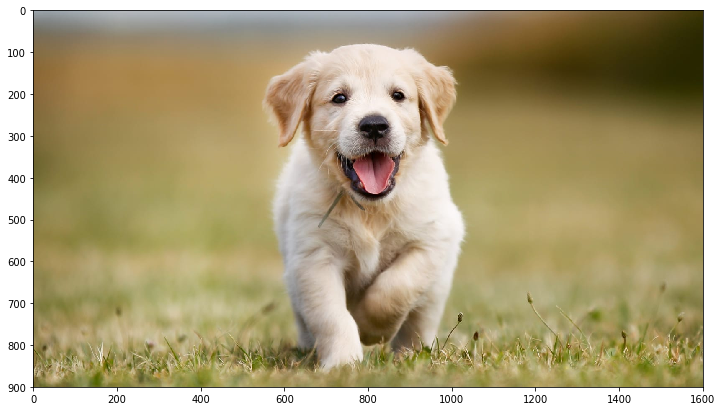

In [5]:
from pynq import Overlay, Xlnk
import numpy as np
from PIL import Image, ImageOps
import matplotlib.pyplot as plt
import time
import cv2

xlnk = Xlnk()


#Reading the image
img_path = "/home/xilinx/jupyter_notebooks/Images/dog.jpeg"
img = Image.open(img_path)

canvas = plt.gcf()
size = canvas.get_size_inches()
canvas.set_size_inches(size*2)
_ = plt.imshow(img)

#img = ImageOps.grayscale(img)
width, height = img.size

print("Image size: {}x{}".format(width, height))
 
#Defining the CMA Buffers
img_inbuff = xlnk.cma_array(shape=(height,width,3),dtype = np.uint8, cacheable = 1)
img_outbuff = xlnk.cma_array(shape=(height-2,width-2,3),dtype = np.int8, cacheable = 1)

img_inbuff[:] = np.array(img)
'''
#_ = plt.imshow(img_inbuff, cmap='gray')'''

print(img_inbuff)


